In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('2000_tickets_19.csv')
df.head(5)

,Case Owner,Subject,Ticket Status,Date/Time Opened,Closed Date,Age (Days),Open,Closed,Email Subject,Email Status,Email Message Date,Account Name,Link to Wrike
0,Adria Doescher,Period Selection,NaN,1/2/2019 10:09,1/21/2019,19,0,1,RE: Period Selection [ ref:_00DG0CiJO._5001...,Replied,1/2/2019 11:46,NaN,NaN
1,Adria Doescher,Period Selection,NaN,1/2/2019 10:09,1/21/2019,19,0,1,RE: Period Selection [ ref:_00DG0CiJO._5001...,Replied,1/2/2019 11:48,NaN,NaN
2,Adria Doescher,Period Selection,NaN,1/2/2019 10:09,1/21/2019,19,0,1,Period Selection,Replied,1/2/2019 10:12,NaN,NaN
3,Adria Doescher,Period Selection,NaN,1/2/2019 10:09,1/21/2019,19,0,1,RE: Period Selection [ ref:_00DG0CiJO._5001...,Sent,1/21/2019 7:15,NaN,NaN
4,Adria Doescher,Period Selection,NaN,1/2/2019 10:09,1/21/2019,19,0,1,"Power Factors, LLC Case No:- 00047535: Period...",Sent,1/2/2019 10:09,NaN,NaN


In [2]:
df['Age (Days)'].mean()

23.230198019801982

In [8]:
df['Age'] = df['Age (Days)']

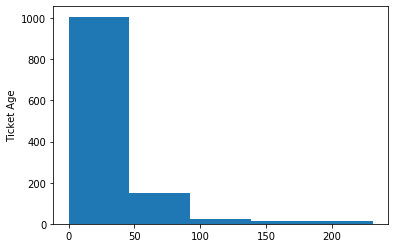

In [9]:
y = df['Age']
x = 
plt.hist(x, bins=5)
plt.ylabel('Ticket Age')
plt.show()

In [10]:
df['Age (Days)'].std()

36.43963566900615